In [1]:
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import decimal
import requests
import boto3
import json
import os

decimal.getcontext().prec = 7

# Get environment variable
load_dotenv('.env')
AWS_ACCESS_KEY_ID = os.getenv("AWS_ACCESS_KEY_ID")
AWS_SECRET_ACCESS_KEY = os.getenv("AWS_SECRET_ACCESS_KEY")

#initialize dynamodb
dynamodb = boto3.resource('dynamodb', region_name='ap-southeast-2',
  aws_access_key_id=AWS_ACCESS_KEY_ID,
  aws_secret_access_key=AWS_SECRET_ACCESS_KEY
)

table_units = dynamodb.Table('IngredientUnits')
table_prices = dynamodb.Table('IngredientPrices')

# Price url get from kasetprice web

In [2]:
price_urls = {
    "pork": "https://kasetpricev2.azurewebsites.net/api/product/getByNameIncludePrices/%E0%B9%80%E0%B8%99%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%AB%E0%B8%A1%E0%B8%B9?from=2019-08-01&to=2020-07-22",
    "beef":"https://kasetpricev2.azurewebsites.net/api/product/getByNameIncludePrices/%E0%B9%80%E0%B8%99%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B8%A7%E0%B8%B1%E0%B8%A7?from=2019-08-01&to=2020-07-22",
    "chicken": "https://kasetpricev2.azurewebsites.net/api/product/getByNameIncludePrices/%E0%B9%80%E0%B8%99%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B9%84%E0%B8%81%E0%B9%88?from=2019-08-01&to=2020-07-22",
    "eggs": "https://kasetpricev2.azurewebsites.net/api/product/getByNameIncludePrices/%E0%B9%84%E0%B8%82%E0%B9%88%E0%B9%84%E0%B8%81%E0%B9%88?from=2019-08-01&to=2020-07-22",
}



In [3]:
# Request data from API

price_data = {}

for k, url in price_urls.items():
    price_data[k] = json.loads(requests.get(url).text)

In [4]:
price_data["pork"]

{'data': {'name': 'เนื้อหมู',
  'description': 'เนื้อหมู',
  'imageUrl': 'https://i.imgur.com/mpWk0eB.jpg',
  'subProducts': [{'name': 'ขาหมู',
    'description': 'ขาหมู',
    'unit': 'บาท/กก.',
    'ranking': 1,
    'product': None,
    'id': 181,
    'enable': True},
   {'name': 'ซี่โครงหมู',
    'description': 'ซี่โครงหมู',
    'unit': 'บาท/กก.',
    'ranking': 2,
    'product': None,
    'id': 182,
    'enable': True},
   {'name': 'ตับหมู',
    'description': 'ตับหมู',
    'unit': 'บาท/กก.',
    'ranking': 3,
    'product': None,
    'id': 183,
    'enable': True},
   {'name': 'เนื้อก้อน',
    'description': 'เนื้อก้อน',
    'unit': 'บาท/กก.',
    'ranking': 4,
    'product': None,
    'id': 184,
    'enable': True},
   {'name': 'เนื้อแดง',
    'description': 'เนื้อแดง',
    'unit': 'บาท/กก.',
    'ranking': 5,
    'product': None,
    'id': 185,
    'enable': True},
   {'name': 'เนื้อไหล่',
    'description': 'เนื้อไหล่',
    'unit': 'บาท/กก.',
    'ranking': 6,
    'product': Non

In [5]:
# Extract the sub products names and units
subproduct_types = {k:{d["id"]:f'{k}_{d["name"]}' for d in price_data[k]["data"]["subProducts"]} for k in price_data}
subproduct_units = {k:{d["id"]:d["unit"] for d in price_data[k]["data"]["subProducts"]} for k in price_data}
subproduct_types
subproduct_id = {}
subproduct_ut = {}
for k in subproduct_types:
    subproduct_id.update(subproduct_types[k])
    subproduct_ut.update(subproduct_units[k])

In [10]:
"|".join([subproduct_id[s] for s in subproduct_id])

'pork_ขาหมู|pork_ซี่โครงหมู|pork_ตับหมู|pork_เนื้อก้อน|pork_เนื้อแดง|pork_เนื้อไหล่|pork_สะโพกหมู|pork_สันนอก|pork_สันใน|pork_สามชั้น|pork_ไส้ตันหมู|pork_ไส้ใหญ่หมู|pork_ไส้อ่อนหมู|pork_หมูบด|beef_ขอบกระด้ง|beef_ขี้ริ้ว|beef_เครื่องใน|beef_ดอกจอก|beef_น่อง|beef_ซี่โครง|beef_เนื้อแดง|beef_เนื้อปลีก|beef_เศษเนื้อ|beef_สันคอ|beef_เนื้อวัวบด|beef_เนื้อก้อน|beef_สันใน|beef_สันนอก|chicken_ไก่บ้าน|chicken_ไก่ทั้งตัว|chicken_ไก่ผ่าซีก|chicken_อกไก่|chicken_ซี่โครงไก่|chicken_ปีกบนไก่|chicken_ปีกกลางไก่|chicken_ปีกไก่เต็ม|chicken_น่องไก่|chicken_สะโพกไก่|chicken_เครื่องในไก่|chicken_ตีนไก่|chicken_เนื้อไก่บด|chicken_ไก่มีชีวิตหน้าฟาร์ม|eggs_ไข่ไก่เบอร์ 0|eggs_ไข่ไก่เบอร์ 1|eggs_ไข่ไก่เบอร์ 2|eggs_ไข่ไก่เบอร์ 3|eggs_ไข่ไก่เบอร์ 4|eggs_ไข่ไก่เบอร์ 5|eggs_ไข่ไก่ต้ม|eggs_ไข่ไก่คละหน้าฟาร์ม'

In [205]:
# Get prices from JSON given by API
dfprice = {k:pd.DataFrame(price_data[k]["data"]["prices"]) for k in price_data}
dfprice["eggs"]

,subProductId,priceDate,avgPrice
0,156,2020-07-22T00:00:00,4.00
1,157,2020-07-22T00:00:00,3.00
2,158,2020-07-22T00:00:00,2.83
3,159,2020-07-22T00:00:00,2.50
4,160,2020-07-22T00:00:00,2.33
...,...,...,...
2098,158,2019-08-01T00:00:00,3.20
2099,159,2019-08-01T00:00:00,3.00
2100,160,2019-08-01T00:00:00,2.80
2101,161,2019-08-01T00:00:00,3.00


In [206]:
# pivot the prices by sub_prodict ids
dfprice = {k:dfprice[k].pivot(index="subProductId", columns="priceDate", values="avgPrice") for k in dfprice}

# Not support thai language
# for k, v in dfprice.items():
#     v.index = list(subproduct_types[k].values())[:len(v.index)]

In [207]:
# Pivot data
dfprice["eggs"]

priceDate,2019-08-01T00:00:00,2019-08-02T00:00:00,2019-08-03T00:00:00,2019-08-04T00:00:00,2019-08-05T00:00:00,2019-08-06T00:00:00,2019-08-07T00:00:00,2019-08-08T00:00:00,2019-08-09T00:00:00,2019-08-11T00:00:00,...,2020-07-13T00:00:00,2020-07-14T00:00:00,2020-07-15T00:00:00,2020-07-16T00:00:00,2020-07-17T00:00:00,2020-07-18T00:00:00,2020-07-19T00:00:00,2020-07-20T00:00:00,2020-07-21T00:00:00,2020-07-22T00:00:00
subProductId,,,,,,,,,,,,,,,,,,,,,
156,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,...,4.00,4.00,4.00,NaN,4.00,4.00,4.00,4.00,4.00,4.00
157,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4,...,3.00,3.00,3.00,NaN,3.00,3.00,3.00,3.00,3.00,3.00
158,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3.2,...,2.83,2.83,2.83,NaN,2.83,2.83,2.83,2.83,2.83,2.83
159,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,2.50,2.50,2.50,NaN,2.50,2.50,2.50,2.50,2.50,2.50
160,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,...,2.33,2.33,2.33,NaN,2.33,2.33,2.33,2.33,2.33,2.33
161,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,2.16,2.16,2.16,NaN,2.16,2.16,2.16,2.16,2.16,2.16
162,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,3.5,...,4.00,4.00,4.00,NaN,4.00,4.00,4.00,4.00,4.00,4.00
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.00,2.00,2.00,2.0,2.00,NaN,NaN,2.00,2.00,2.00


# Visualization

In [208]:
subproduct_id

{181: 'pork_ขาหมู',
 182: 'pork_ซี่โครงหมู',
 183: 'pork_ตับหมู',
 184: 'pork_เนื้อก้อน',
 185: 'pork_เนื้อแดง',
 186: 'pork_เนื้อไหล่',
 187: 'pork_สะโพกหมู',
 188: 'pork_สันนอก',
 189: 'pork_สันใน',
 190: 'pork_สามชั้น',
 191: 'pork_ไส้ตันหมู',
 192: 'pork_ไส้ใหญ่หมู',
 193: 'pork_ไส้อ่อนหมู',
 194: 'pork_หมูบด',
 195: 'beef_ขอบกระด้ง',
 196: 'beef_ขี้ริ้ว',
 197: 'beef_เครื่องใน',
 198: 'beef_ดอกจอก',
 199: 'beef_น่อง',
 200: 'beef_ซี่โครง',
 201: 'beef_เนื้อแดง',
 202: 'beef_เนื้อปลีก',
 203: 'beef_เศษเนื้อ',
 204: 'beef_สันคอ',
 205: 'beef_เนื้อวัวบด',
 206: 'beef_เนื้อก้อน',
 207: 'beef_สันใน',
 208: 'beef_สันนอก',
 163: 'chicken_ไก่บ้าน',
 164: 'chicken_ไก่ทั้งตัว',
 165: 'chicken_ไก่ผ่าซีก',
 166: 'chicken_อกไก่',
 167: 'chicken_ซี่โครงไก่',
 168: 'chicken_ปีกบนไก่',
 169: 'chicken_ปีกกลางไก่',
 170: 'chicken_ปีกไก่เต็ม',
 171: 'chicken_น่องไก่',
 172: 'chicken_สะโพกไก่',
 173: 'chicken_เครื่องในไก่',
 174: 'chicken_ตีนไก่',
 175: 'chicken_เนื้อไก่บด',
 176: 'chicken_ไก่มีชีวิต

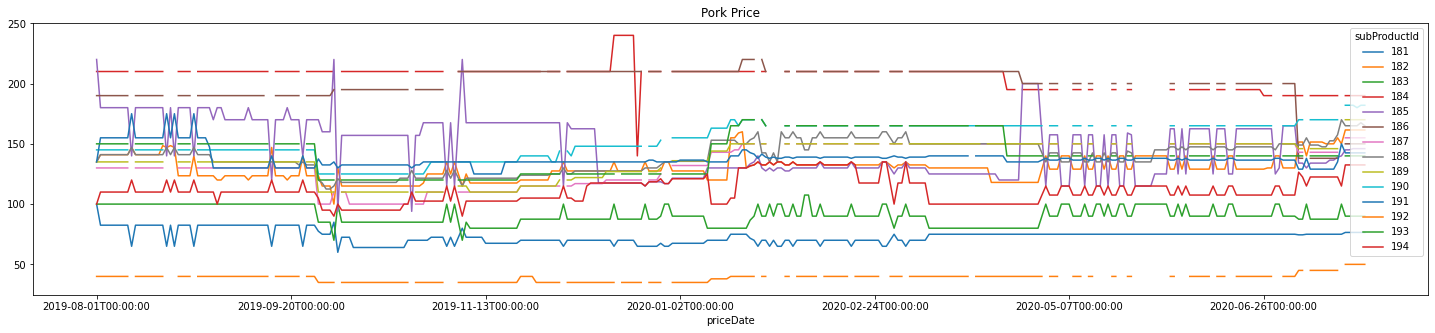

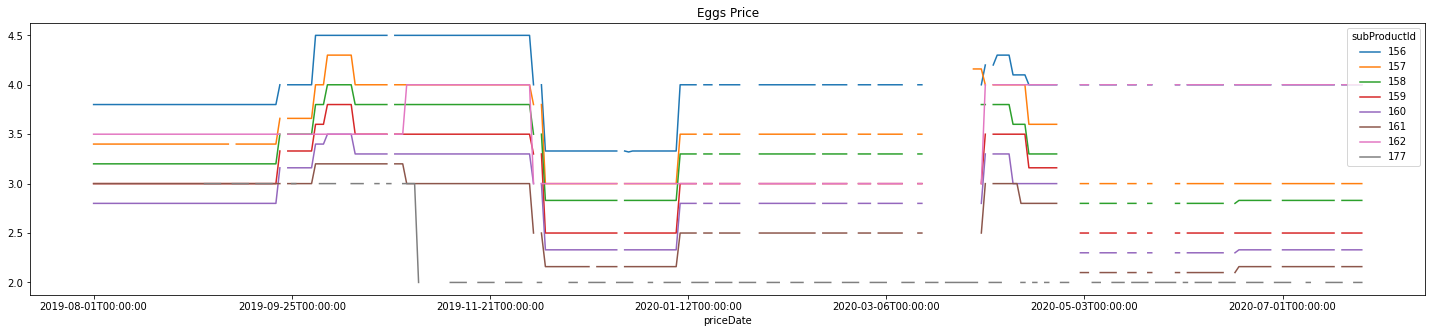

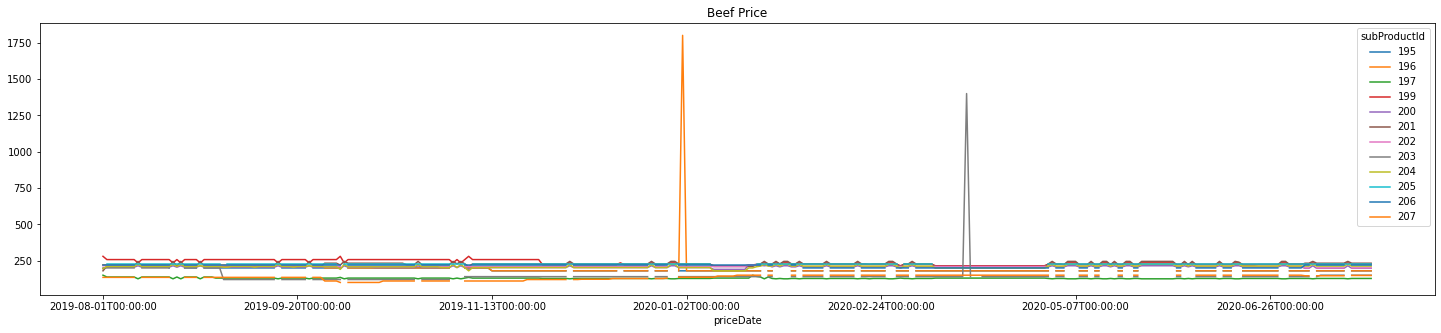

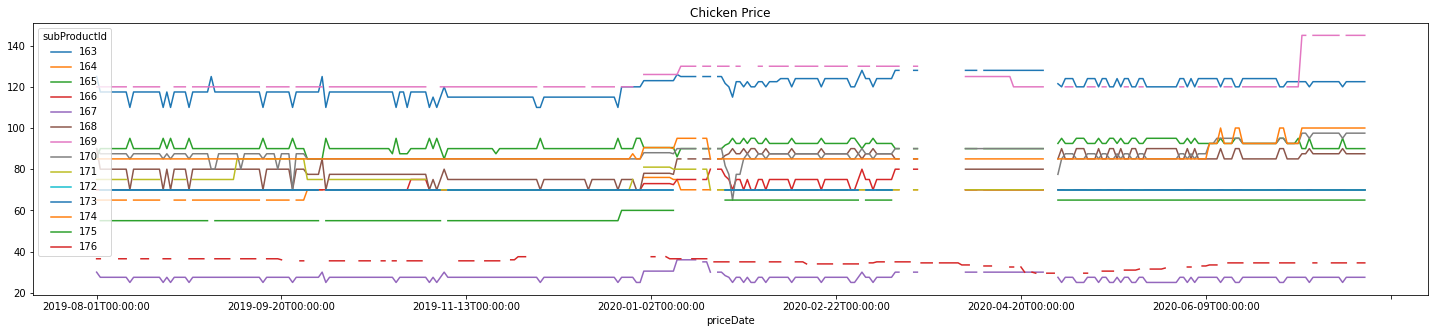

In [209]:
_ = dfprice["pork"].T.plot(figsize=(25, 5), title="Pork Price")
_ = dfprice["eggs"].T.plot(figsize=(25, 5), title="Eggs Price")
_ = dfprice["beef"].T.plot(figsize=(25, 5), title="Beef Price")
_ = dfprice["chicken"].T.plot(figsize=(25, 5), title="Chicken Price")

# Cleansing data

## Merge datasets

In [11]:
# Merge and sort data
dfmerge = pd.concat([dfprice[k] for k in dfprice]).T
dfmerge = dfmerge.sort_index()

In [12]:
# change indexes to datetime
dfmerge.index = pd.to_datetime(dfmerge.index)

## Remove outliers

using 3 S.D. methodology to filter outliers

In [13]:
# Get statistical data
data_mean, data_std = dfmerge.mean(axis=0), dfmerge.std(axis=0)
# identify outliers
cut_off = data_std * 3
lower_bound, upper_bound = data_mean - cut_off, data_mean + cut_off

# Filter low outliers
dfmerge[dfmerge < lower_bound] = np.nan

# Filter high outliers
dfmerge[dfmerge > upper_bound] = np.nan


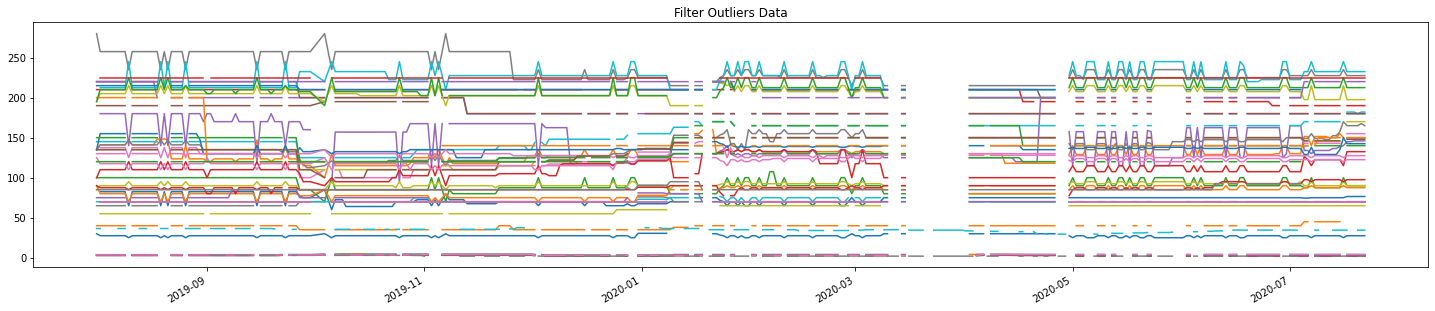

In [14]:
# Data after remove outlier
dfmerge.plot(figsize=(25, 5), legend=False, title="Filter Outliers Data")

## missing value (Interpolation)

### I do not apply the moving average because I don't want to loss the signals

In [15]:
# Interpolate the data using time method (not much require because the interval is long as constant 1 day.)
dfintp = dfmerge.interpolate(method='time', axis=0, limit_direction="both")

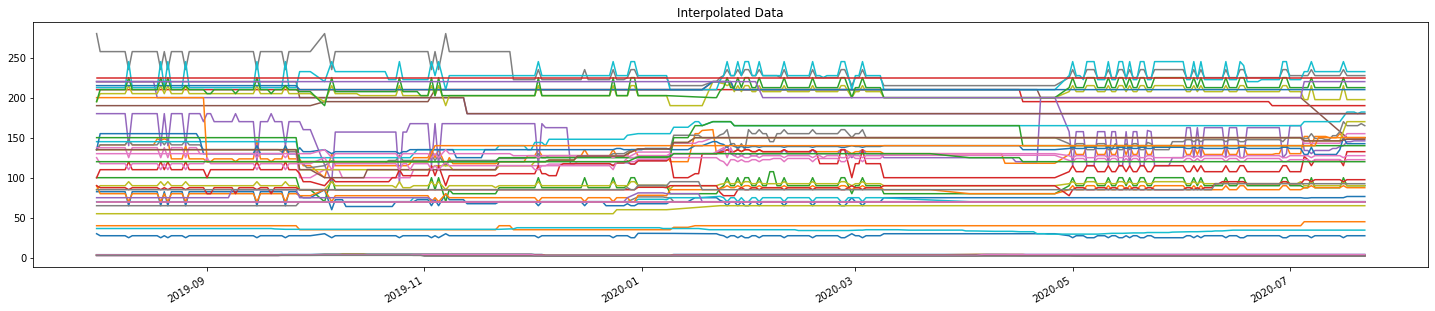

In [16]:
dfintp.plot(figsize=(25, 5), legend=False, title="Interpolated Data")

# Fit Model

In [17]:
# Fit the model using autoregression algorithms
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

# Because it's output distribution is normal so we use Mean Squared Error to estimate the performance
from sklearn.metrics import mean_squared_error

Evaluating

<img src="./time_series_cv.png">

In [183]:
# Apply the time series 10-fold cross validation to evaluate the model.
base_train_ratio = 0.3
nfold = 10

tsp = TimeSeriesSplit(n_splits=nfold)

mean_square_errors = []
test_pred = {}
forecast = {}

_models = [AutoReg, ARMA, ARIMA, SARIMAX]
_model_names = ["AR", "ARMA", "ARIMA", "SARIMAX"]
_preds = {}
_mse = {}

for k in dfintp:
    X = dfintp[k]
    num_base_tr = int(X.shape[0]*base_train_ratio)
    base_tr = X[:num_base_tr]
    base_cv = X[num_base_tr:]
    _mse[k] = []
    
    for i, (tr, cv) in enumerate(tsp.split(base_cv)):
        X_tr = np.concatenate([base_tr, base_cv[tr]])
        X_cv = base_cv[cv].values
        
        _mse[k].append({})
        
        for _m in range(len(_models)):
            if _model_names[_m] == "AR":
                for lag in [1, 5, 8, 10, 12, 15, 20, 30]:
                    model = _models[_m](X_tr, lags=lag, trend='ct', seasonal=False).fit()
#                     hyp = model.predict(start=lag, end=X_cv.shape[0]+lag-1)
                    hyp = model.predict(start=X_tr.shape[0]-lag, end=X_tr.shape[0] + X_cv.shape[0] - lag - 1)
                    _mse[k][-1][f"{_model_names[_m]}_lags{lag}"] = mean_squared_error(hyp, X_cv)
            else:
                try:
                    model = _models[_m](X_tr, order=[1, 1, 1]).fit(disp=0)
#                     hyp = model.predict(start=1, end=X_cv.shape[0])
#                     print(hyp)
                    hyp = model.predict(start=X_tr.shape[0], end=X_tr.shape[0] + X_cv.shape[0] - 1)
                    _mse[k][-1][f"{_model_names[_m]}_order(1, 1, 1)"] = mean_squared_error(hyp, X_cv)
                except:
                    _mse[k][-1][f"{_model_names[_m]}_order(1, 1, 1)"] = np.nan
                            
    print(k)
            

181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
199
200
201
202
203
204
205
206
207
163
164
165
166
167
168
169
170
171
172
173
174
175
176
156
157
158
159
160
161
162
177


### I found that the SARIMAX produce the best accuracies in almost data type
### So I gonna use the SARIMAX as a main predictor

In [187]:
print("Predict MSE")

for k in _mse:
    dfmse = pd.DataFrame(_mse[k])
    print(dfmse.columns[np.argmin(dfmse.mean(axis=0))])

Predict MSE
ARMA_order(1, 1, 1)
AR_lags5
ARMA_order(1, 1, 1)
ARMA_order(1, 1, 1)
ARMA_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
AR_lags10
AR_lags8
AR_lags8
ARMA_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
ARMA_order(1, 1, 1)
ARMA_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
ARMA_order(1, 1, 1)
ARMA_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
AR_lags5
ARMA_order(1, 1, 1)
ARMA_order(1, 1, 1)
ARMA_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
AR_lags30
AR_lags5
SARIMAX_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
ARMA_order(1, 1, 1)
ARMA_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
ARMA_order(1, 1, 1)
ARMA_order(1, 1, 1)
ARMA_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
ARMA_order(1, 1, 1)
ARMA_order(1, 1, 1)
ARMA_order(1, 1, 1)
ARMA_order(1, 1, 1)
ARMA_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
SARIMAX_order(1, 1, 1)
SARIMAX_order(1, 1, 1)


In [192]:
_Selected_model = [
    (ARMA, {"order": (1, 1, 1)}),
    (AutoReg, {"lags": 5, "trend": 'ct'}),
    (ARMA, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (AutoReg, {"lags": 10, "trend": 'ct'}),
    (AutoReg, {"lags": 8, "trend": 'ct'}),
    (AutoReg, {"lags": 8, "trend": 'ct'}),
    (ARMA, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (AutoReg, {"lags": 5, "trend": 'ct'}),
    (ARMA, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (AutoReg, {"lags": 30, "trend": 'ct'}),
    (AutoReg, {"lags": 5, "trend": 'ct'}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (ARMA, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
    (SARIMAX, {"order": (1, 1, 1)}),
]

In [210]:
forecast = {}

for algo, k in zip(_Selected_model, dfintp):
    X = dfintp[k]
    final_model = algo[0](X.values, **algo[1]).fit()
#         final_model = ARMA(X.values, order=(1, 1, 1)).fit()
    forecast[k] = final_model.predict(start=X.shape[0], end=X.shape[0] + 29)
#     except:
#         final_model = SARIMAX(X.values, order=(1, 1, 1)).fit()
#         forecast[k] = final_model.predict(start=X.shape[0], end=X.shape[0] + 29)
#     forecast[k] = final_model.predict(start=1, end=30)

In [211]:
" ".join(dfintp[181].astype(str).tolist())

'82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 65.0 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 65.0 82.5 65.0 82.5 82.5 82.5 82.5 65.0 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 82.5 65.0 82.5 82.5 82.5 82.5 82.5 82.5 82.5 65.0 82.5 82.5 82.5 77.5 75.0 75.0 75.0 85.0 60.0 72.5 72.5 72.5 64.0 64.0 64.0 64.0 64.0 64.0 64.0 64.0 64.0 64.0 64.0 64.0 64.0 64.0 70.0 70.0 70.0 70.0 70.0 70.0 72.5 72.5 72.5 72.5 65.0 72.5 65.0 72.5 80.0 72.5 72.5 72.5 72.5 72.5 67.5 67.5 67.5 67.5 67.5 67.5 67.5 67.5 67.5 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 65.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 65.0 70.0 70.0 70.0 70.0 70.0 65.0 65.0 65.0 65.0 65.0 65.0 67.5 65.0 65.0 67.5 67.5 67.5 67.5 67.5 67.5 67.5 67.5 67.5 70.0 70.0 70.0 70.0 70.0 70.0 72.5 75.0 75.0 75.0 75.0 75.0 75.0 71.666666 70.0 65.0 70.0 70.0 65.0 70.0 65.0 65.0 70.0 70.0 65.0 70.0 70.0 70.0 70.0 70.0 70.0 65.0 70.0 70.0 70.0 70.0 70.0 70.0 70.0 65.0 70.0 70.0

In [212]:
forecast

{181: array([76.20661053, 76.17359204, 76.14123474, 76.10952539, 76.07845102,
        76.0479989 , 76.01815657, 75.98891183, 75.96025272, 75.93216749,
        75.90464466, 75.87767297, 75.85124139, 75.82533909, 75.79995548,
        75.77508016, 75.75070297, 75.72681393, 75.70340326, 75.68046139,
        75.65797892, 75.63594666, 75.61435558, 75.59319687, 75.57246185,
        75.55214204, 75.53222914, 75.51271499, 75.4935916 , 75.47485116]),
 182: array([148.56832951, 147.73355105, 147.0265262 , 146.32787998,
        145.81125701, 145.27849431, 144.79966694, 144.37888813,
        143.98797237, 143.64359113, 143.3331912 , 143.05352825,
        142.80466798, 142.58169601, 142.38333899, 142.20740633,
        142.05162789, 141.91449884, 141.79426797, 141.68946477,
        141.5987712 , 141.52092125, 141.45480433, 141.39939128,
        141.35374114, 141.31700241, 141.28839293, 141.26720103,
        141.25277747, 141.2445291 ]),
 183: array([90.18115479, 90.20242907, 90.2229141 , 90.24263914,

# Visualize forecast data

{181: 'pork_ขาหมู',
 182: 'pork_ซี่โครงหมู',
 183: 'pork_ตับหมู',
 184: 'pork_เนื้อก้อน',
 185: 'pork_เนื้อแดง',
 186: 'pork_เนื้อไหล่',
 187: 'pork_สะโพกหมู',
 188: 'pork_สันนอก',
 189: 'pork_สันใน',
 190: 'pork_สามชั้น',
 191: 'pork_ไส้ตันหมู',
 192: 'pork_ไส้ใหญ่หมู',
 193: 'pork_ไส้อ่อนหมู',
 194: 'pork_หมูบด',
 195: 'beef_ขอบกระด้ง',
 196: 'beef_ขี้ริ้ว',
 197: 'beef_เครื่องใน',
 198: 'beef_ดอกจอก',
 199: 'beef_น่อง',
 200: 'beef_ซี่โครง',
 201: 'beef_เนื้อแดง',
 202: 'beef_เนื้อปลีก',
 203: 'beef_เศษเนื้อ',
 204: 'beef_สันคอ',
 205: 'beef_เนื้อวัวบด',
 206: 'beef_เนื้อก้อน',
 207: 'beef_สันใน',
 208: 'beef_สันนอก',
 163: 'chicken_ไก่บ้าน',
 164: 'chicken_ไก่ทั้งตัว',
 165: 'chicken_ไก่ผ่าซีก',
 166: 'chicken_อกไก่',
 167: 'chicken_ซี่โครงไก่',
 168: 'chicken_ปีกบนไก่',
 169: 'chicken_ปีกกลางไก่',
 170: 'chicken_ปีกไก่เต็ม',
 171: 'chicken_น่องไก่',
 172: 'chicken_สะโพกไก่',
 173: 'chicken_เครื่องในไก่',
 174: 'chicken_ตีนไก่',
 175: 'chicken_เนื้อไก่บด',
 176: 'chicken_ไก่มีชีวิต

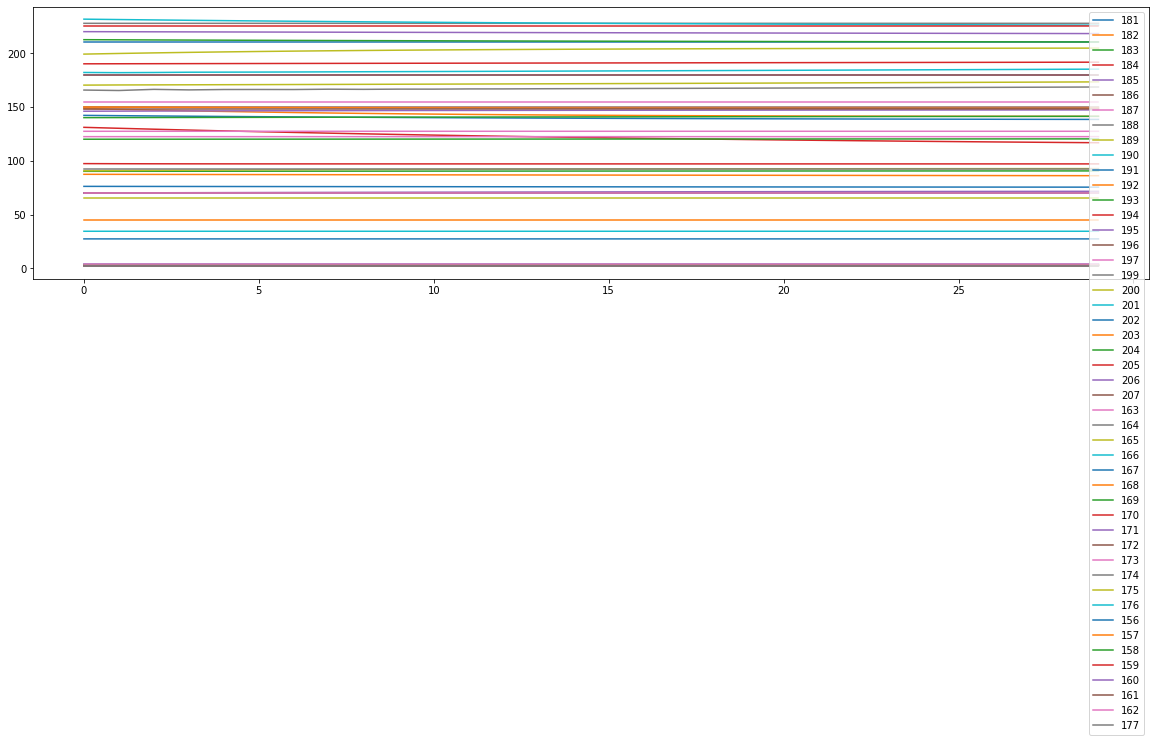

In [213]:
_ = pd.DataFrame(forecast).plot(figsize=(20, 5))
subproduct_id

In [214]:
# replace the ids with their names
dfforecast = pd.DataFrame(forecast)
dfforecast.columns = [subproduct_id[c] for c in dfforecast.columns]
dfforecast.head()

,pork_ขาหมู,pork_ซี่โครงหมู,pork_ตับหมู,pork_เนื้อก้อน,pork_เนื้อแดง,pork_เนื้อไหล่,pork_สะโพกหมู,pork_สันนอก,pork_สันใน,pork_สามชั้น,...,chicken_เนื้อไก่บด,chicken_ไก่มีชีวิตหน้าฟาร์ม,eggs_ไข่ไก่เบอร์ 0,eggs_ไข่ไก่เบอร์ 1,eggs_ไข่ไก่เบอร์ 2,eggs_ไข่ไก่เบอร์ 3,eggs_ไข่ไก่เบอร์ 4,eggs_ไข่ไก่เบอร์ 5,eggs_ไข่ไก่ต้ม,eggs_ไข่ไก่คละหน้าฟาร์ม
0,76.206611,148.568330,90.181155,190.056120,146.011952,149.966856,155.000007,165.672496,170.264898,182.017022,...,65.000002,34.500149,3.999339,3.007400,2.835654,2.508157,2.337277,2.16,4.0,2.0
1,76.173592,147.733551,90.202429,190.112136,146.103073,149.941589,155.000008,165.257554,170.414670,181.846767,...,65.000004,34.500285,3.998687,3.015279,2.841633,2.516715,2.345055,2.16,4.0,2.0
2,76.141235,147.026526,90.222914,190.167899,146.188359,149.922327,155.000008,166.325386,170.495438,181.994167,...,65.000005,34.500410,3.998052,3.022996,2.847509,2.525090,2.352672,2.16,4.0,2.0
3,76.109525,146.327880,90.242639,190.223408,146.268184,149.907643,155.000008,165.825219,170.571007,182.244955,...,65.000007,34.500524,3.997433,3.030553,2.853283,2.533287,2.360132,2.16,4.0,2.0
4,76.078451,145.811257,90.261632,190.278665,146.342898,149.896449,155.000008,166.186521,170.650074,182.309873,...,65.000009,34.500628,3.996831,3.037954,2.858957,2.541308,2.367438,2.16,4.0,2.0


In [215]:
# units of subproducts
subproduct_ut = {subproduct_id[k]:subproduct_ut[k] for k in subproduct_ut}
subproduct_ut

{'pork_ขาหมู': 'บาท/กก.',
 'pork_ซี่โครงหมู': 'บาท/กก.',
 'pork_ตับหมู': 'บาท/กก.',
 'pork_เนื้อก้อน': 'บาท/กก.',
 'pork_เนื้อแดง': 'บาท/กก.',
 'pork_เนื้อไหล่': 'บาท/กก.',
 'pork_สะโพกหมู': 'บาท/กก.',
 'pork_สันนอก': 'บาท/กก.',
 'pork_สันใน': 'บาท/กก.',
 'pork_สามชั้น': 'บาท/กก.',
 'pork_ไส้ตันหมู': 'บาท/กก.',
 'pork_ไส้ใหญ่หมู': 'บาท/กก.',
 'pork_ไส้อ่อนหมู': 'บาท/กก.',
 'pork_หมูบด': 'บาท/กก.',
 'beef_ขอบกระด้ง': 'บาท/กก.',
 'beef_ขี้ริ้ว': 'บาท/กก.',
 'beef_เครื่องใน': 'บาท/กก.',
 'beef_ดอกจอก': 'บาท/กก.',
 'beef_น่อง': 'บาท/กก.',
 'beef_ซี่โครง': 'บาท/กก.',
 'beef_เนื้อแดง': 'บาท/กก.',
 'beef_เนื้อปลีก': 'บาท/กก.',
 'beef_เศษเนื้อ': 'บาท/กก.',
 'beef_สันคอ': 'บาท/กก.',
 'beef_เนื้อวัวบด': 'บาท/กก.',
 'beef_เนื้อก้อน': 'บาท/กก.',
 'beef_สันใน': 'บาท/กก.',
 'beef_สันนอก': 'บาท/กก.',
 'chicken_ไก่บ้าน': 'บาท/กก.',
 'chicken_ไก่ทั้งตัว': 'บาท/กก.',
 'chicken_ไก่ผ่าซีก': 'บาท/กก.',
 'chicken_อกไก่': 'บาท/กก.',
 'chicken_ซี่โครงไก่': 'บาท/กก.',
 'chicken_ปีกบนไก่': 'บาท/กก.',
 'chicken_

# Milk

**<font color="red">For now, I cannot find the history of milk price. so I just get the current milk price and using in the whole month.</font>**

src: https://shoponline.tescolotus.com/groceries/th-TH/shop/%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B7%E0%B9%88%E0%B8%AD%E0%B8%87%E0%B8%94%E0%B8%B7%E0%B9%88%E0%B8%A1,-%E0%B8%82%E0%B8%99%E0%B8%A1%E0%B8%82%E0%B8%9A%E0%B9%80%E0%B8%84%E0%B8%B5%E0%B9%89%E0%B8%A2%E0%B8%A7-&-%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%AB%E0%B8%A7%E0%B8%B2%E0%B8%99/%E0%B8%99%E0%B8%A1/%E0%B8%99%E0%B8%A1%E0%B8%AA%E0%B8%94

<img src="./milk.png">

In [216]:
subproduct_ut["นม"] = "บาท/ลิตร"
dfforecast["นม"] = 91.75/2 # 2000 ml
dfforecast.head()

,pork_ขาหมู,pork_ซี่โครงหมู,pork_ตับหมู,pork_เนื้อก้อน,pork_เนื้อแดง,pork_เนื้อไหล่,pork_สะโพกหมู,pork_สันนอก,pork_สันใน,pork_สามชั้น,...,chicken_ไก่มีชีวิตหน้าฟาร์ม,eggs_ไข่ไก่เบอร์ 0,eggs_ไข่ไก่เบอร์ 1,eggs_ไข่ไก่เบอร์ 2,eggs_ไข่ไก่เบอร์ 3,eggs_ไข่ไก่เบอร์ 4,eggs_ไข่ไก่เบอร์ 5,eggs_ไข่ไก่ต้ม,eggs_ไข่ไก่คละหน้าฟาร์ม,นม
0,76.206611,148.568330,90.181155,190.056120,146.011952,149.966856,155.000007,165.672496,170.264898,182.017022,...,34.500149,3.999339,3.007400,2.835654,2.508157,2.337277,2.16,4.0,2.0,45.875
1,76.173592,147.733551,90.202429,190.112136,146.103073,149.941589,155.000008,165.257554,170.414670,181.846767,...,34.500285,3.998687,3.015279,2.841633,2.516715,2.345055,2.16,4.0,2.0,45.875
2,76.141235,147.026526,90.222914,190.167899,146.188359,149.922327,155.000008,166.325386,170.495438,181.994167,...,34.500410,3.998052,3.022996,2.847509,2.525090,2.352672,2.16,4.0,2.0,45.875
3,76.109525,146.327880,90.242639,190.223408,146.268184,149.907643,155.000008,165.825219,170.571007,182.244955,...,34.500524,3.997433,3.030553,2.853283,2.533287,2.360132,2.16,4.0,2.0,45.875
4,76.078451,145.811257,90.261632,190.278665,146.342898,149.896449,155.000008,166.186521,170.650074,182.309873,...,34.500628,3.996831,3.037954,2.858957,2.541308,2.367438,2.16,4.0,2.0,45.875


# Set the day

In [217]:
from datetime import datetime, timedelta

# mock up day
today = datetime.strptime("2020-07-23", "%Y-%m-%d")
indexes = [today + timedelta(days=i) for i in range(dfforecast.shape[0])]
dfforecast.index = indexes

In [218]:
dfforecast.head()

,pork_ขาหมู,pork_ซี่โครงหมู,pork_ตับหมู,pork_เนื้อก้อน,pork_เนื้อแดง,pork_เนื้อไหล่,pork_สะโพกหมู,pork_สันนอก,pork_สันใน,pork_สามชั้น,...,chicken_ไก่มีชีวิตหน้าฟาร์ม,eggs_ไข่ไก่เบอร์ 0,eggs_ไข่ไก่เบอร์ 1,eggs_ไข่ไก่เบอร์ 2,eggs_ไข่ไก่เบอร์ 3,eggs_ไข่ไก่เบอร์ 4,eggs_ไข่ไก่เบอร์ 5,eggs_ไข่ไก่ต้ม,eggs_ไข่ไก่คละหน้าฟาร์ม,นม
2020-07-23,76.206611,148.568330,90.181155,190.056120,146.011952,149.966856,155.000007,165.672496,170.264898,182.017022,...,34.500149,3.999339,3.007400,2.835654,2.508157,2.337277,2.16,4.0,2.0,45.875
2020-07-24,76.173592,147.733551,90.202429,190.112136,146.103073,149.941589,155.000008,165.257554,170.414670,181.846767,...,34.500285,3.998687,3.015279,2.841633,2.516715,2.345055,2.16,4.0,2.0,45.875
2020-07-25,76.141235,147.026526,90.222914,190.167899,146.188359,149.922327,155.000008,166.325386,170.495438,181.994167,...,34.500410,3.998052,3.022996,2.847509,2.525090,2.352672,2.16,4.0,2.0,45.875
2020-07-26,76.109525,146.327880,90.242639,190.223408,146.268184,149.907643,155.000008,165.825219,170.571007,182.244955,...,34.500524,3.997433,3.030553,2.853283,2.533287,2.360132,2.16,4.0,2.0,45.875
2020-07-27,76.078451,145.811257,90.261632,190.278665,146.342898,149.896449,155.000008,166.186521,170.650074,182.309873,...,34.500628,3.996831,3.037954,2.858957,2.541308,2.367438,2.16,4.0,2.0,45.875


# Save the forecast results

In [219]:
# Save the units
for k, v in subproduct_ut.items():
    table_units.put_item(
        Item={
            "type": k,
            "unit": v,
        }
    )

In [220]:
# Save the forecast results (repeatly replace old result by new)
for row in dfforecast.index:
    for col in dfforecast.columns:
        _price = dfforecast.loc[row, col]
        _price = decimal.Decimal(str(_price))
        table_prices.put_item(
            Item={
                "type": col,
                "date": row.strftime("%Y-%m-%d"),
                "price": _price
            }
        )